# Handhabung von scikit-learn

Wir wollen uns den Umgang mit scikit-learn am einfachen Beispiel einer Linearen Regression auf synthetischen Daten ansehen.  
Dies umfasst die Erzeugung und Aufteilung der Daten für das Training, das Training des Modells, sowie die Evaluierung und Visualisierung der Ergebnisse.

Hierfür werden wir folgende Module nutzen:
* [sklearn.datasets](https://scikit-learn.org/stable/api/sklearn.datasets.html): Werkzeuge zur Nutzung gängiger Datensätze für ML bzw. zur Erzeugung synthetischer Daten
* [sklearn.model_selection](https://scikit-learn.org/stable/api/sklearn.model_selection.html): Werkzeuge für Datenaufteilung, Cross-Validierung und Parameter-Tuning
* [sklearn.linear_model](https://scikit-learn.org/stable/api/sklearn.linear_model.html): Sammlung von linearen Modellen für Regression und Klassifikation
* [sklearn.metrics](https://scikit-learn.org/stable/api/sklearn.metrics.html): Sammlung von verschiedenen Metriken für die Modell-Evaluierung

**Im Allgemeinen wird auf den umfangreichen [User Guide](https://scikit-learn.org/stable/user_guide.html) von scikit-learn verwiesen.**

In [1]:
import matplotlib.pyplot as plt

## Erzeugen von synthetischen Daten

Wir erzeugen uns synthetische Daten für ein Regressionsproblem mittels [`make_regression`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html). Wir starten einfach: 
* 500 Datenpunkte (Samples) mit je einem Feature in `X`...
* Zur Vorhersage einer Zielvariablen (Target) `y`...
* Und fügen etwas Noise hinzu


In [2]:
from sklearn.datasets import make_regression

# Es hat sich folgende Notation durchgesetzt:
# X = Features
# y = Target
X, y = make_regression(
    n_samples=500,
    n_features=1,
    noise=20.0,
    random_state=42
)

print("X:", X.shape)
print("X[0]:", X[0])
print("y:", y.shape)
print("y[0]:", y[0])

X: (500, 1)
X[0]: [-0.80829829]
y: (500,)
y[0]: -42.59813771675134


Die erzeugten Daten können wir uns mit `matplotlib` in einem Scatter-Plot visualisieren.

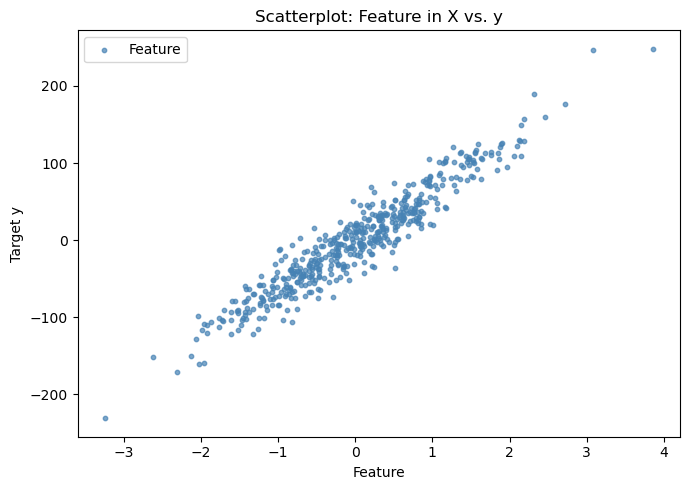

In [3]:
plt.figure(figsize=(7, 5))
plt.scatter(X, y, color='steelblue', label='Feature', alpha=0.7, s=10)    
plt.title('Scatterplot: Feature in X vs. y')
plt.xlabel('Feature')
plt.ylabel('Target y')
plt.legend()
plt.tight_layout()
plt.show()

## Train-Test-Split

Wir teilen die Daten für Training und Evaluierung, um die Generalisierung eines trainierten Modells auf unbekannten Daten überprüfen zu können.  
Hierfür nutzen wir [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [4]:
from sklearn.model_selection import train_test_split

# Aufteilen: 80% Training, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Trainingsdaten:", X_train.shape, "Trainingslabels:", y_train.shape)
print("Testdaten:", X_test.shape, "Testlabels:", y_test.shape)

Trainingsdaten: (400, 1) Trainingslabels: (400,)
Testdaten: (100, 1) Testlabels: (100,)


## Modell auswählen und trainieren

* Wir importieren das Modell [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) und initialisieren das entsprechende Python-Objekt mittels `()`.  
* Das Training des Modells wird über die Methode [`.fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) gestartet - fast alle Modelle und Algorithmen in scikit-learn verfügen über diese Methode.
* Dieser Methode übergeben wir die Trainingsdaten, aufgeteilt in Features `X_train` und Target `y_train`.
* Die Modellparameter werden jetzt dahingehend angepasst, das Target auf Basis der zugehörigen Feature möglichst gut vorhersagen zu können.

In [5]:
from sklearn.linear_model import LinearRegression

# Modell initialisieren
model = LinearRegression()

In [6]:
# Supervised Training - "Fitting" des Modells auf die Trainingsdaten mit bekanntem Label
model.fit(X_train, y_train)

LinearRegression()

## Vorhersage und Evaluierung

Wir möchten jetzt überprüfen, wie gut das Modell das Target für bislang unbekannte Feature vorhersagen kann.

* Die Vorhersage (Prediction) wird über die Methode [`.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) ausgeführt - fast alle Modelle und Algorithmen in scikit-learn verfügen über diese Methode.
* Dieser Methode übergeben wir die Feature der Testdaten und bekommen die zugehörigen Predictions des Target zurück.

In [7]:
# Vorhersage auf den Testdaten
y_pred = model.predict(X_test)

Wir können nun die Predictions mit den bekannten Target-Werten der Testdaten vergleichen und daraus verschiedene Metriken für die Evaluierung der Modellgüte ableiten.

* Eine Metrik, die LinearRegression bereitstellt, ist der sog. `r2`-Score (Bestimmtheitsmaß einer Regression), welcher die globale Anpassungsgüte bewertet.
* Weitere passende Regressions-Metriken werden z.B. im [User Guide - Regression Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) beschrieben.
* Wir entscheiden uns zusätzlich für den [Mittleren Absoluten Fehler (MAE)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error).
* Im Allgemeinen ist es sinnvoll, sich mehrere Metriken berechnen zu lassen, um einen besseren Eindruck zur Modellgüte zu erhalten.

In [8]:
from sklearn.metrics import mean_absolute_error

# Metriken zur Bestimmung der Modellgüte

# r^2-Score ausgeben (Bestimmtheitsmaß), zwischen 0.0 und 1.0, höher ist besser
r2_score = model.score(X_test, y_test)
print(f"r^2-Score auf Testdaten: {r2_score:.3f}")

# Mittleren absoluten Fehler berechnen (MAE), am besten ist 0.0
mse = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE) auf Testdaten: {mse:.3f}")

r^2-Score auf Testdaten: 0.902
Mean Absolute Error (MAE) auf Testdaten: 15.396


Zusätzlich bieten viele Modelle die Möglichkeit, Einblick in die angepassten Modellparameter zu nehmen - für die lineare Regression sind das:
* Regressionskoeffizienten (auch _slope_): die Steigung der Regressionsgeraden
* Intercept: Schnitt der y-Achse

In [9]:
# Auslesen der gelernten Modellparameter
print("Regressionskoeffizienten:", model.coef_)
print("Intercept:", model.intercept_)

Regressionskoeffizienten: [62.91154316]
Intercept: -1.0306112713112263


## Visualisierung

Abschließend wollen wir uns alle Aspekte für ein besseres Verständnis noch einmal darstellen lassen:
* Die Verteilung der Trainingsdaten
* Die Verteilung der Testdaten
* Die von unserem Modell erzeugte Regressionslinie

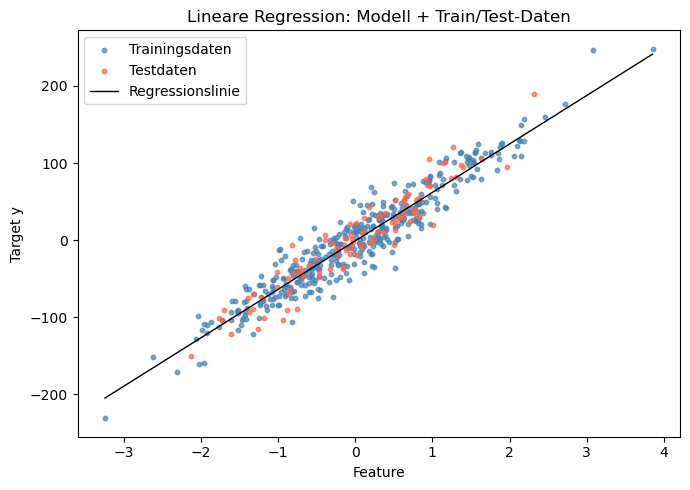

In [10]:
# Regressionslinie erzeugen
import numpy as np
x_line = np.linspace(X.min(), X.max()).reshape(-1, 1)
y_line = model.predict(x_line)

# Plott der Regressionslinie mit Trainings- und Testdaten
plt.figure(figsize=(7, 5))
plt.scatter(X_train, y_train,
            color='steelblue', label='Trainingsdaten',
            alpha=0.7, s=10)
plt.scatter(X_test, y_test,
            color='tomato', label='Testdaten',
            alpha=0.7, s=10)
plt.plot(x_line, y_line,
         color='black', label='Regressionslinie',
         linewidth=1)
plt.title('Lineare Regression: Modell + Train/Test-Daten')
plt.xlabel('Feature')
plt.ylabel('Target y')
plt.legend()
plt.tight_layout()
plt.show()